# Import the Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py

# Load Dataset

In [5]:
data = pd.read_csv('zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
data.shape

(51717, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Deleting Unnnecessary Columns

In [10]:
del data['url']
del data['address']
del data['phone']
del data['reviews_list']
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


## Checking for duplicate values

In [11]:
data.dropna(how='any',inplace=True)
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# Renaming columes appropriately

In [12]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
data= data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                      'listed_in(city)':'city'})
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'menu_item', 'type',
       'city'],
      dtype='object')

In [14]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


# Cleaning the dataset

In [15]:
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

# Replacing the "," with nothing and converting the results to float

In [16]:
data['cost']=data['cost'].str.replace(',','')
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1400',
       '1350', '2200', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [17]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
data=data.loc[data.rate !='NEW'] #getting rid of new

In [19]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
data['rate']=data['rate'].str.replace('/5','')
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1350',
       '2200', '1400', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23259 entries, 0 to 51715
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          23259 non-null  object
 1   online_order  23259 non-null  object
 2   book_table    23259 non-null  object
 3   rate          23259 non-null  object
 4   votes         23259 non-null  int64 
 5   location      23259 non-null  object
 6   rest_type     23259 non-null  object
 7   dish_liked    23259 non-null  object
 8   cuisines      23259 non-null  object
 9   cost          23259 non-null  object
 10  menu_item     23259 non-null  object
 11  type          23259 non-null  object
 12  city          23259 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.5+ MB


# Data Visualisations

# Most Famous restaurants chains in Bangalore

C:\Users\spoor\AppData\Local\Temp\ipykernel_9404\1927764128.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




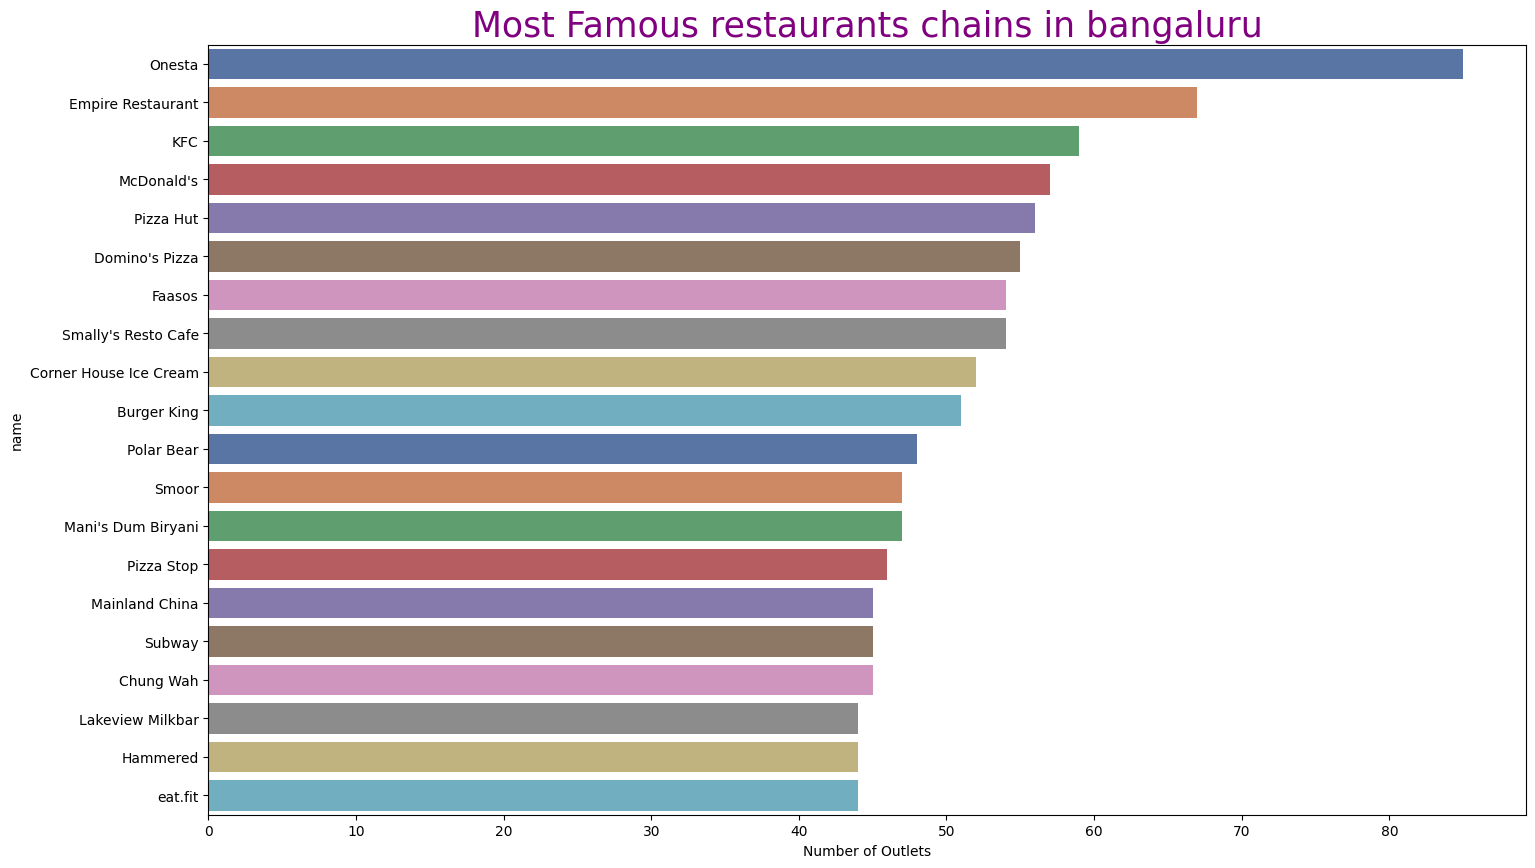

In [24]:
plt.figure(figsize=(17,10))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index, palette='deep')
plt.title("Most Famous restaurants chains in bangaluru", fontsize=25,color='purple')
plt.xlabel("Number of Outlets")
plt.show()

# Whether the restaurant offers Table booking or no

In [ ]:
x =data['book_table'].value_counts()
colors =['#80080','#0000A0']

trace=go.Pie(labels=x.index, values=x, textinfo='value',
             marker=dict(colors=colors,line=dict(color='#001000', width=2)))
layout=go.Layout(title='Table Booking', width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

# Insight
Most of the Restaurants do not offer Table Booking

# Whether the restaurants Deliver online or no

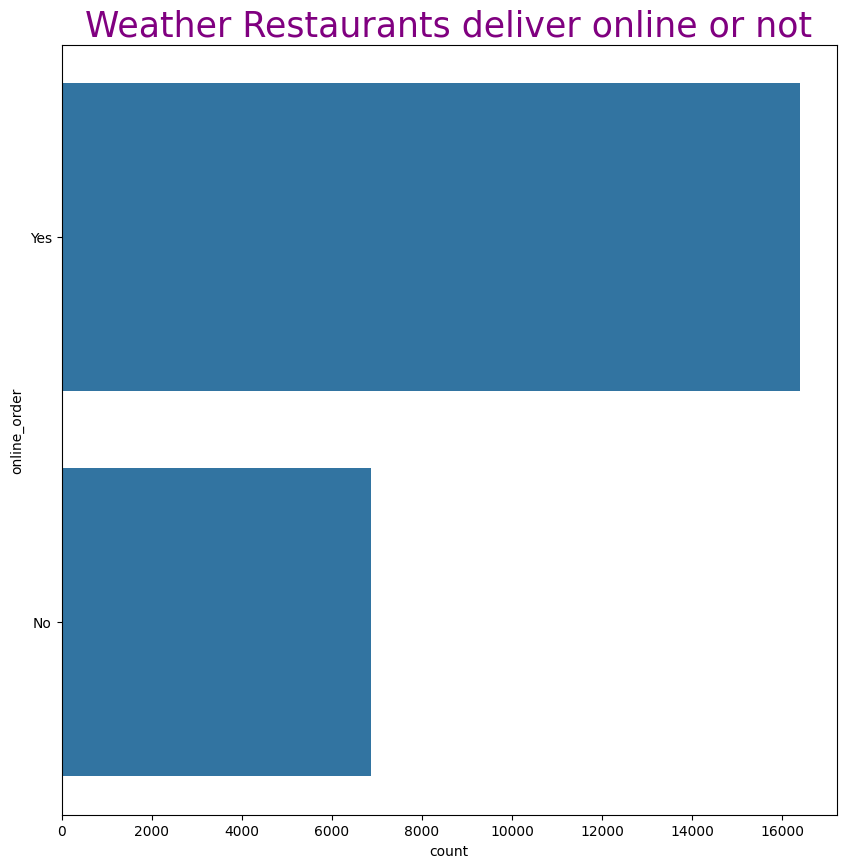

In [26]:
sns.countplot(data['online_order'])
fig =plt.gcf()
fig.set_size_inches(10,10)
plt.title("Weather Restaurants deliver online or not", fontsize=25,color='purple')
plt.show()

# Rating Distributions

C:\Users\spoor\AppData\Local\Temp\ipykernel_9404\1161785264.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='rate', ylabel='Density'>

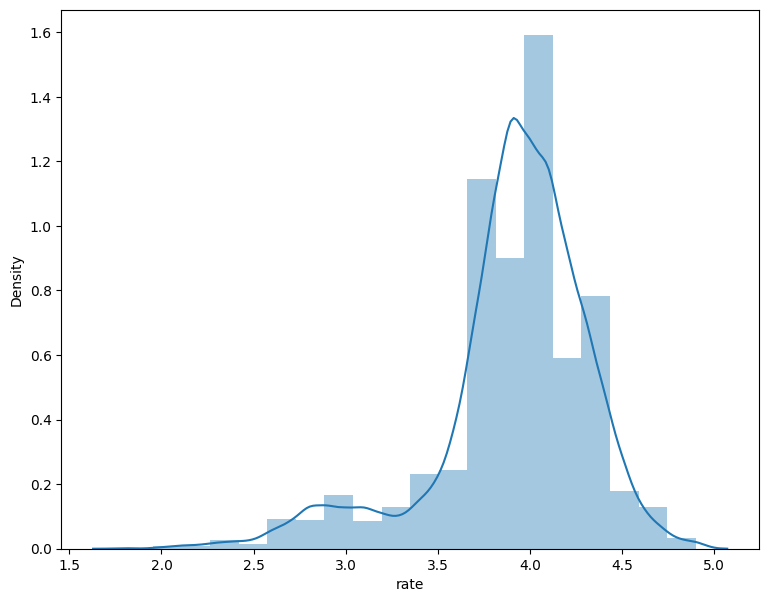

In [27]:
plt.figure(figsize=(9,7))

sns.distplot(data['rate'],bins=20)

# Insight
We can infer from above that most of the ratings are within 3.5 and 4.5

In [28]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [29]:
data['rate'].max()

'4.9 '

In [30]:
data['rate'].min()

'1.8'

In [31]:
data['rate']=data['rate'].astype(float)

In [32]:
((data['rate']>=1) & (data['rate']<2)).sum()

5

In [34]:
((data['rate']>=2) & (data['rate']<3)).sum()

1179

In [35]:
((data['rate']>=3) & (data['rate']<4)).sum()

10158

In [36]:
(data['rate']>=4).sum()

11917

# Plotting the counts with the help of pie chart

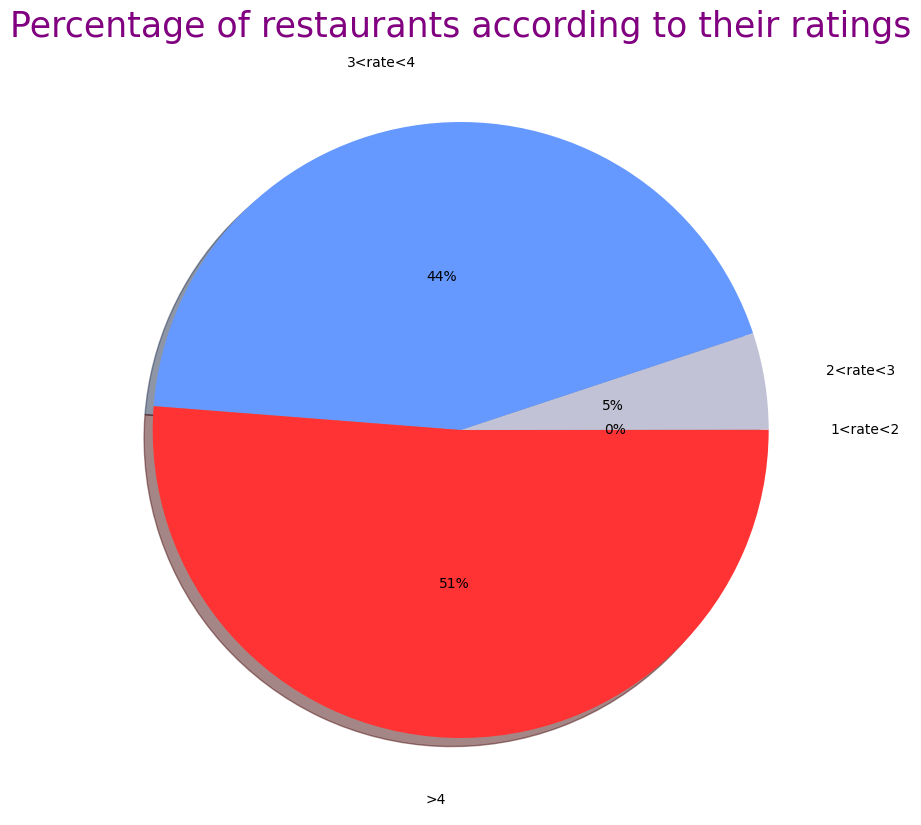

In [37]:
slices=[((data['rate']>=1) & (data['rate']<2)).sum(),
       ((data['rate']>=2) & (data['rate']<3)).sum(),
       ((data['rate']>=3) & (data['rate']<4)).sum(),
        (data['rate']>=4).sum()
       ]
labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors =['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2, shadow=True)
fig= plt.gcf()
plt.title('Percentage of restaurants according to their ratings',fontsize=25,color='purple')
fig.set_size_inches(10,10)
plt.show()

# Services Types

C:\Users\spoor\AppData\Local\Temp\ipykernel_9404\2469338660.py:1: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0.5, 1.0, 'Type of Service')

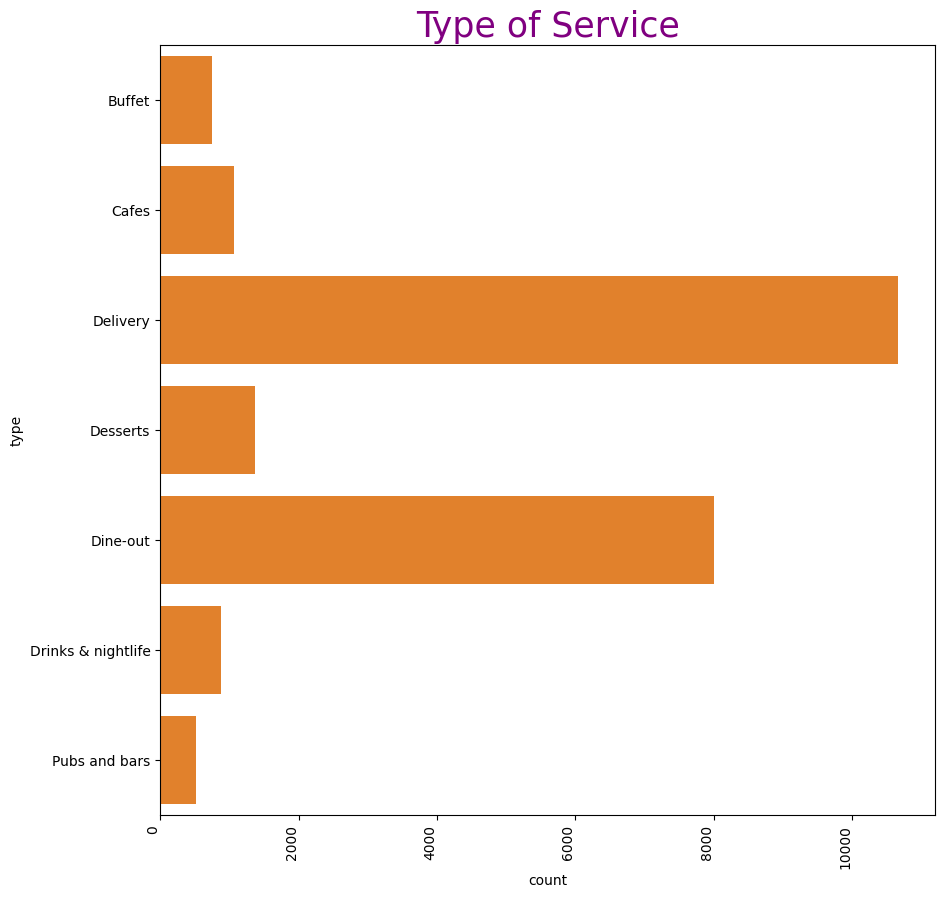

In [38]:
sns.countplot(data['type']).set_xticklabels(sns.countplot(data['type']).get_xticklabels(),rotation=90, ha='right')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type of Service',fontsize=25,color='purple')

Here the two main service types are Delivery and Dine-outle

# Distribution of Cost of Food for two People

In [39]:
from plotly.offline import iplot

# Distribution of changes

C:\Users\spoor\AppData\Local\Temp\ipykernel_9404\205062067.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




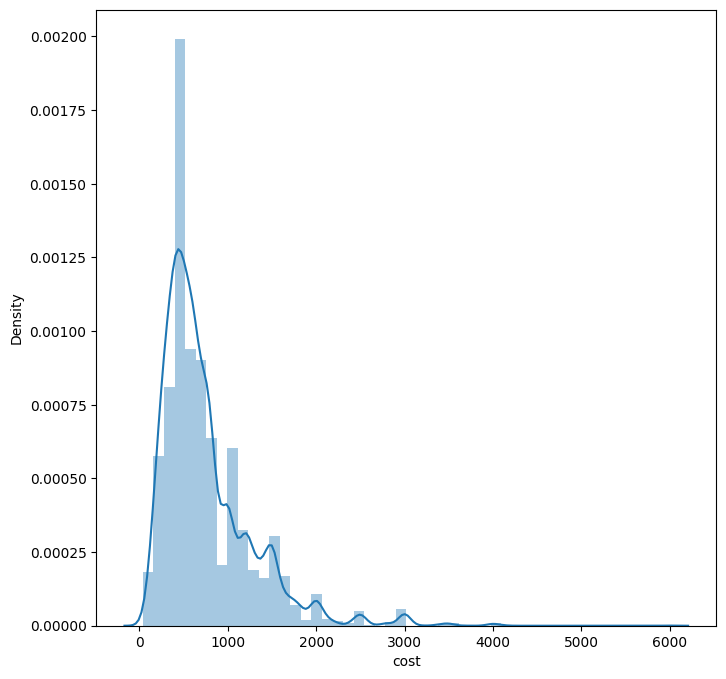

In [40]:
plt.figure(figsize=(8,8))
sns.distplot(data['cost'])
plt.show()

# Most liked Dishes

In [41]:
# re= regular expression (use for splitting words)

import re

data.index=range(data.shape[0])
likes=[]
for i in range(data.shape[0]):
    array_split=re.split(',',data['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [42]:
data.index=range(data.shape[0])
data.index

RangeIndex(start=0, stop=23259, step=1)

In [43]:
print("Count of Most liked dishes in Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Bangalore


 Pasta              2695
 Pizza              1916
 Cocktails          1882
 Burgers            1738
 Mocktails          1623
 Biryani            1309
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1171
 Fish               1118
 Paratha            1108
 Salads             1057
 Chicken Biryani    1004
Cocktails            891
 Fries               877
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      783
 Thali               770
Biryani              749
Pizza                748
 Roti                729
 Brownie             726
 Salad               678
 Hot Chocolate       672
Name: count, dtype: int64

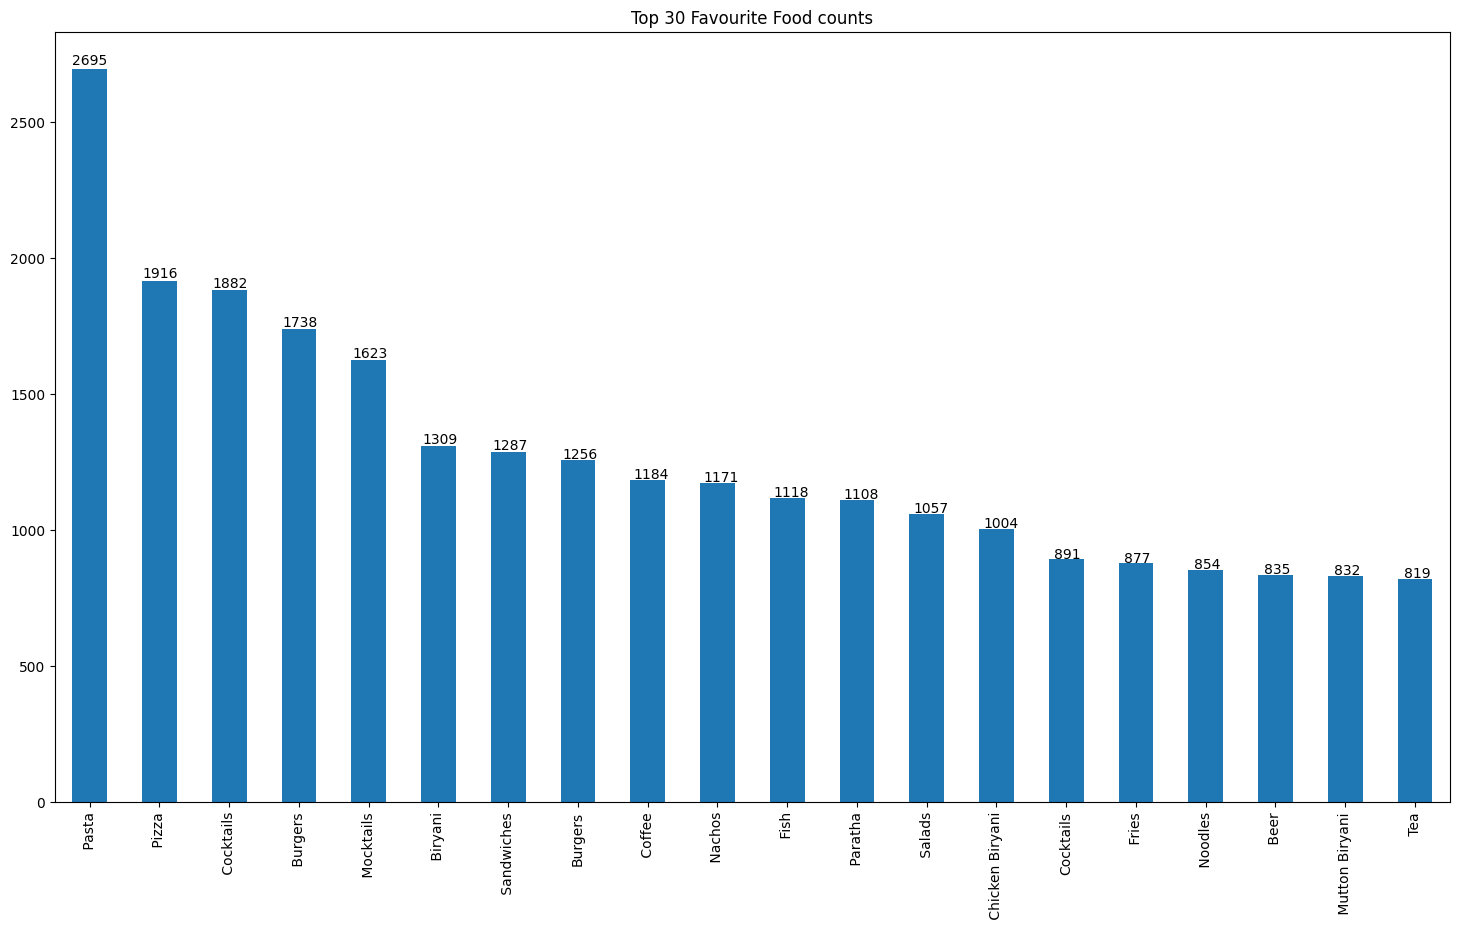

In [44]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(18,10),title = 'Top 30 Favourite Food counts')

for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()*1.005, i.get_height()*1.005))

We can infer from the analysis that the 5 most liked dishes are
**Pasta**,**Pizza**,**Cocktails**,**Burgers**, and **Mocktails**

# Restaurant and their counts

Text(0.5, 0, 'count')

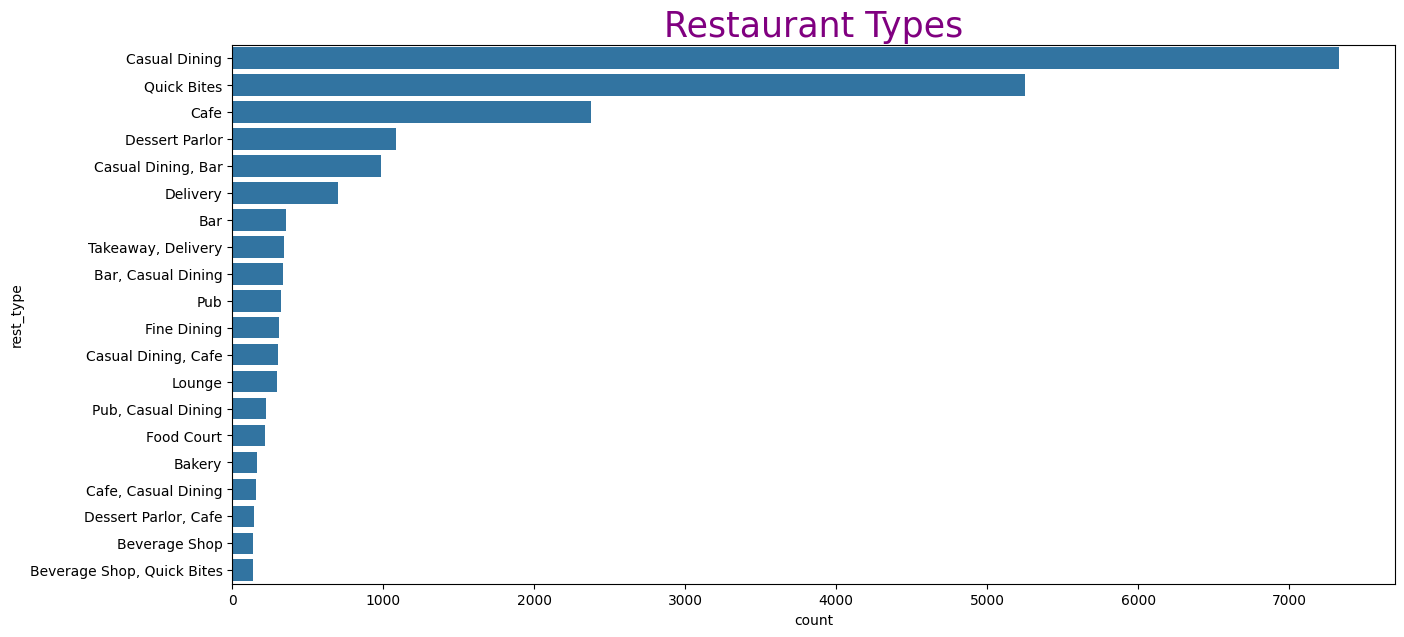

In [48]:
plt.figure(figsize=(15, 7))
rest = data['rest_type'].value_counts()[:20]
sns.barplot(y=rest.index, x=rest)
plt.title("Restaurant Types", fontsize=25, color='purple')
plt.xlabel("count")


**Casual Dining**,**Quick Bites** and **Cafe** are the 3 most common types of Restaurants in Banglore 

# Most Famous Restaurants

C:\Users\spoor\AppData\Local\Temp\ipykernel_9404\1239753744.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Number of outlets')

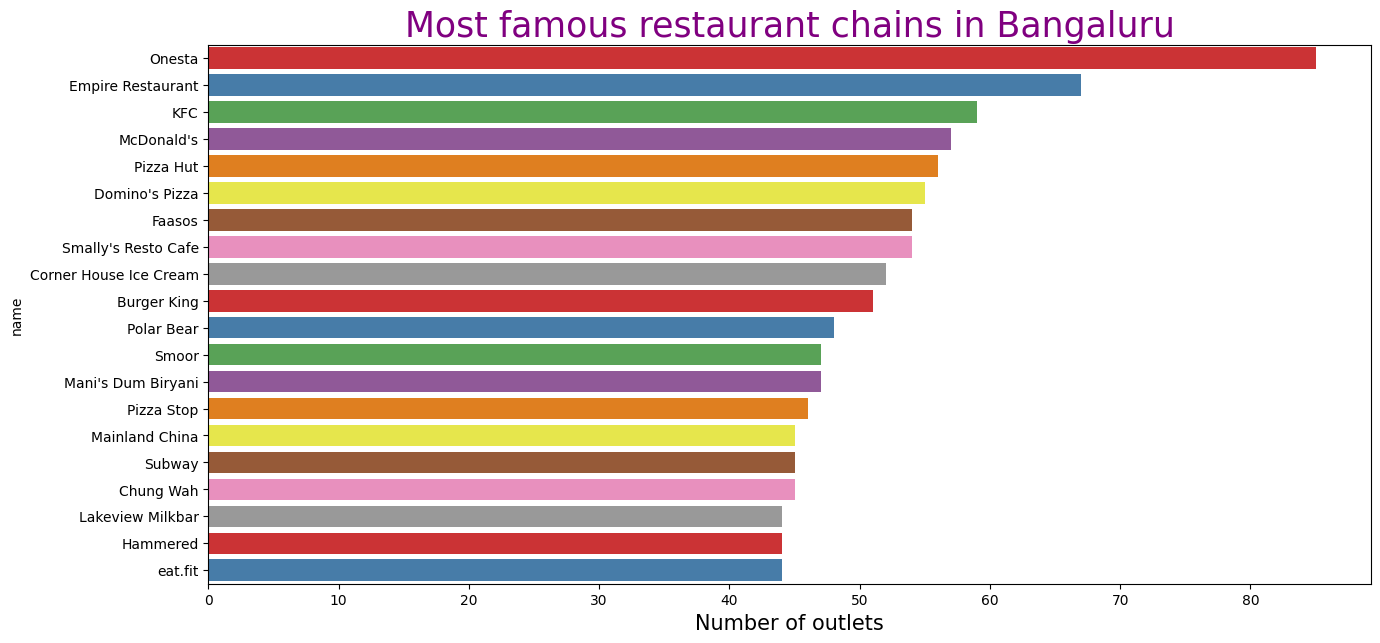

In [49]:
plt.figure(figsize=(15,7))
chains= data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title('Most famous restaurant chains in Bangaluru', fontsize=25,color='purple')
plt.xlabel("Number of outlets",size=15)

# Building Our Model

In [50]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [51]:
data=data.drop(['dish_liked'],axis=1)

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
list1=['online_order','book_table','rest_type','cuisines','city','location','menu_item']
for i in list1:
    data[i]=le.fit_transform(data[i])
    
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item,type,city
0,Jalsa,1,1,4.1,775,1,20,1386,800,5047,Buffet,1
1,Spice Elephant,1,0,4.1,787,1,20,594,800,5047,Buffet,1
2,San Churro Cafe,1,0,3.8,918,1,16,484,800,5047,Buffet,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,62,1587,300,5047,Buffet,1
4,Grand Village,0,0,3.8,166,4,20,1406,600,5047,Buffet,1


In [54]:
my_data=data.iloc[:,[1,2,4,5,6,8]]
my_data.to_csv('Zomato_data.csv',index=False)

In [55]:
x = data.iloc[:,[1,2,4,5,6,8]]
x.head()

,online_order,book_table,votes,location,rest_type,cost
0,1,1,775,1,20,800
1,1,0,787,1,20,800
2,1,0,918,1,16,800
3,0,0,88,1,62,300
4,0,0,166,4,20,600


In [56]:
y = data['rate'].values
y

array([4.1, 4.1, 3.8, ..., 2.8, 2.5, 4.3])

In [57]:
x

,online_order,book_table,votes,location,rest_type,cost
0,1,1,775,1,20,800
1,1,0,787,1,20,800
2,1,0,918,1,16,800
3,0,0,88,1,62,300
4,0,0,166,4,20,600
...,...,...,...,...,...,...
23254,1,1,128,84,5,1200
23255,0,0,77,84,38,2000
23256,0,0,161,84,21,1200
23257,0,0,81,84,21,800


# Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [59]:
feature=StandardScaler().fit(x).transform(x)
feature

array([[ 0.64757765,  1.68448377,  0.15232819, -1.484286  , -0.63076897,
         0.08917598],
       [ 0.64757765, -0.59365369,  0.16310541, -1.484286  , -0.63076897,
         0.08917598],
       [ 0.64757765, -0.59365369,  0.28075674, -1.484286  , -0.82582973,
         0.08917598],
       ...,
       [-1.54421637, -0.59365369, -0.39910627,  2.08399245, -0.58200379,
         0.85769059],
       [-1.54421637, -0.59365369, -0.47095441,  2.08399245, -0.58200379,
         0.08917598],
       [-1.54421637,  1.68448377, -0.33174864, -0.45249464, -1.41101198,
         3.3553631 ]])

# Split the data

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16281, 6), (6978, 6), (16281,), (6978,))

# Apply Regressions Models

## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [62]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [63]:
print(lin_reg.score(x_train,y_train))
print(lin_reg.score(x_test,y_test))

0.2186251897634366
0.22312965770555115


In [64]:
lin_reg_pred=lin_reg.predict(x_test)
from sklearn.metrics import r2_score
lin_reg_score=r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for Linear Regressions: ",lin_reg_score)

Accuracy score for Linear Regressions:  22.312965770555117


# Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
rfr =RandomForestRegressor()
rfr

RandomForestRegressor()

In [66]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [67]:
print(rfr.score(x_train,y_train))
print(rfr.score(x_test,y_test))

0.9835465495481385
0.8821981227541714


In [68]:
rfr_pred=rfr.predict(x_test)

In [69]:
from sklearn.metrics import r2_score
rfr_score= r2_score(y_test,rfr_pred)*100
print("Accuracy score for Random Forest Regressor: ", rfr_score)

Accuracy score for Random Forest Regressor:  88.21981227541714


# ExtraTree Regressor

In [70]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()

In [71]:
et.fit(x_train,y_train)

ExtraTreesRegressor()

In [72]:
print(et.score(x_train,y_train))
print(et.score(x_test,y_test))

0.9978434989690456
0.9092278103085267


In [73]:
et_pred=et.predict(x_test)

In [74]:
from sklearn.metrics import r2_score
et_score = r2_score(y_test,et_pred)*100
print("Accuracy score for ExtraTree Regressor: ", et_score)

Accuracy score for ExtraTree Regressor:  90.92278103085268


# Compare Actual rating with Random Forest Regressor new Predicted Rating

In [75]:
sample = pd.DataFrame({'Actual Rating': y_test,
                       'Predicted Rating': np.round(et_pred,2)})
sample

,Actual Rating,Predicted Rating
0,4.1,4.10
1,4.1,4.08
2,3.6,3.67
3,4.4,4.40
4,3.9,3.90
...,...,...
6973,4.0,4.00
6974,4.0,4.00
6975,3.6,3.60
6976,4.0,4.00


# AS you can see Our model is working good its predicted Ratings is Nearly to the Actual Ratings

# Save Ratings Sample as a CSV file

In [76]:
sample.to_csv("ModelPredicitionSample.csv",index=False)

# Use pickle to save our model so that we can use it later

In [77]:
import pickle
pickle.dump(et,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))